In [1]:
from sqlalchemy import create_engine
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import gridspec
import seaborn as sns

PG_USER = 'mushroom-writer'
PG_PASSWORD = '481224v!'
PG_HOST = 'skoeb.ddns.net'
PG_PORT = '5432'
PG_DB = 'mushroom'
PG_URI = f"postgresql://{PG_USER}:{PG_PASSWORD}@{PG_HOST}:{PG_PORT}/{PG_DB}"

In [2]:
# --- Download Table ---
engine = create_engine(PG_URI)

query = """SELECT * FROM dummy.sensor_readings"""
df = pd.read_sql(query, engine)

df.set_index(pd.DatetimeIndex(df['timestamp']), inplace=True)
df.drop('timestamp', axis='columns', inplace=True)

df

,temperature,humidity,moisture_reading,moisture_pct,temperature_status,humidity_status,fan_status
timestamp,,,,,,,
2021-02-19 20:12:37.693084,22.0,91.0,-100.0,-100.0,True,False,False
2021-02-19 20:12:53.387805,22.0,91.0,-100.0,-100.0,True,False,False
2021-02-19 20:13:08.966540,22.0,91.0,-100.0,-100.0,True,False,False
2021-02-19 20:13:24.493061,22.0,91.0,-100.0,-100.0,True,False,False
2021-02-19 20:13:40.136480,22.0,91.0,-100.0,-100.0,True,False,False
...,...,...,...,...,...,...,...
2021-02-19 22:42:16.400632,22.0,84.0,-100.0,-100.0,True,True,True
2021-02-19 22:42:31.799161,22.0,84.0,-100.0,-100.0,True,True,True
2021-02-19 22:42:47.331575,22.0,83.0,-100.0,-100.0,True,True,True


In [3]:
# --- Clean up ---
df = df.resample('5T').mean()
df = df['2021-02-17 05:20:00':]
df = df.dropna(subset=['temperature','moisture_reading'])


In [4]:
df

,temperature,humidity,moisture_reading,moisture_pct,temperature_status,humidity_status,fan_status
timestamp,,,,,,,
2021-02-19 20:10:00,22.000000,91.000000,-100.0,-100.0,1.0,0.000000,0.000000
2021-02-19 20:15:00,22.000000,90.263158,-100.0,-100.0,1.0,0.000000,0.000000
2021-02-19 20:20:00,22.000000,90.263158,-100.0,-100.0,1.0,0.000000,0.000000
2021-02-19 20:25:00,22.000000,89.105263,-100.0,-100.0,1.0,0.000000,0.000000
2021-02-19 20:30:00,22.000000,88.400000,-100.0,-100.0,1.0,0.000000,0.000000
2021-02-19 20:35:00,22.000000,88.842105,-100.0,-100.0,1.0,0.000000,0.105263
2021-02-19 20:40:00,21.789474,85.421053,-100.0,-100.0,1.0,0.578947,0.894737
2021-02-19 20:45:00,21.900000,86.100000,-100.0,-100.0,1.0,1.000000,0.000000
2021-02-19 20:50:00,22.000000,91.526316,-100.0,-100.0,1.0,0.052632,0.000000


[None, None, None, None, None, None, None, None, None, None]

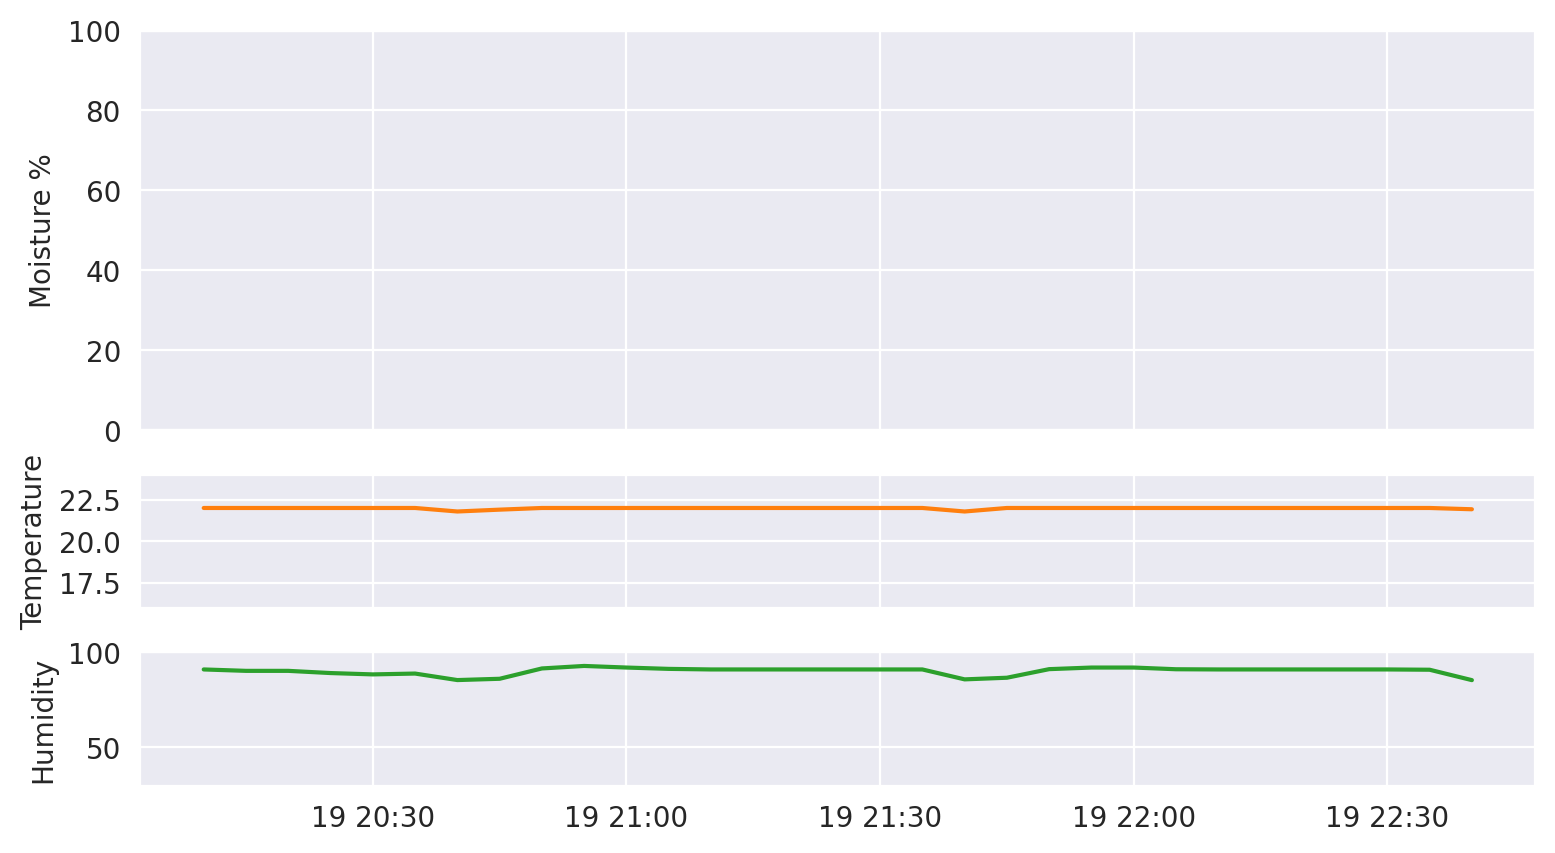

In [5]:
cp = sns.color_palette()
sns.set_style('darkgrid')

fig = plt.figure(figsize=(9,5), dpi=200)
gs = gridspec.GridSpec(3,1, height_ratios=[3,1,1])
ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1])
ax3 = plt.subplot(gs[2])

ax1.plot(df.index, df['moisture_pct'],
           color=cp[0])
ax2.plot(df.index, df['temperature'],
           color=cp[1])
ax3.plot(df.index, df['humidity'],
           color=cp[2])

ax1.set_ylabel('Moisture %')
ax2.set_ylabel('Temperature')
ax3.set_ylabel('Humidity')

ax1.set_ylim(0,100)
ax2.set_ylim(16,24)
ax3.set_ylim(30,100)

plt.setp(ax1.get_xticklabels(), visible=False)
plt.setp(ax2.get_xticklabels(), visible=False)